In [1]:
import sys
sys.path.append('./ecg2mem/')
sys.path.append("/usr/lib/python2.7/dist-packages")
import dataProc
import preprocess.pseudoEcgCurve as pseudoEcgC
import preprocess.pseudoEcg as pseudoEcg
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 


% matplotlib inline

In [2]:
phie = dataProc.loadData('/mnt/Omer/Project/07.DeepElectrodeMapping/simulation/20190524_2/phie_')

In [50]:
elec = np.array([[150, 100, 2]])
pecg = pseudoEcgC.calcPecgSequenceCurve(phie, elec,map_xyz)

In [98]:
pecg=pseudoEcgC.mapCurve(-50)

AttributeError: 'module' object has no attribute 'mapCurve'

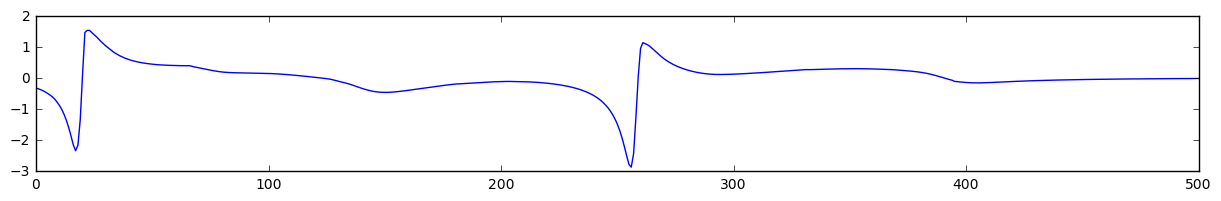

In [51]:
plt.figure(figsize=(15,2))
plt.plot(pecg)

In [29]:
elec = np.array([[150, 100, 2]])
pecg = pseudoEcg.calcPecgSequence(phie, elec)

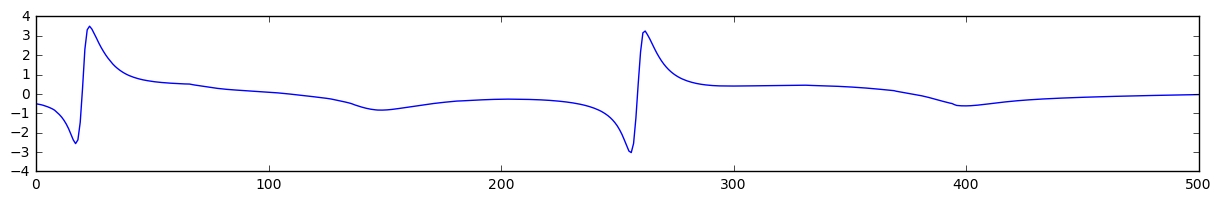

In [30]:
plt.figure(figsize=(15,2))
plt.plot(pecg)

In [21]:
x = np.linspace(0, 199, 200)
y = np.linspace(0, 199, 200)

In [45]:
A = np.zeros((200,100))
b = np.linspace(0, -150, 100)
B =np.tile(b,(200,1))
print(B)
C = np.hstack((A, B))
#C = C.T
print(C)

[[   0.           -1.51515152   -3.03030303 ..., -146.96969697
  -148.48484848 -150.        ]
 [   0.           -1.51515152   -3.03030303 ..., -146.96969697
  -148.48484848 -150.        ]
 [   0.           -1.51515152   -3.03030303 ..., -146.96969697
  -148.48484848 -150.        ]
 ..., 
 [   0.           -1.51515152   -3.03030303 ..., -146.96969697
  -148.48484848 -150.        ]
 [   0.           -1.51515152   -3.03030303 ..., -146.96969697
  -148.48484848 -150.        ]
 [   0.           -1.51515152   -3.03030303 ..., -146.96969697
  -148.48484848 -150.        ]]
[[   0.            0.            0.         ..., -146.96969697
  -148.48484848 -150.        ]
 [   0.            0.            0.         ..., -146.96969697
  -148.48484848 -150.        ]
 [   0.            0.            0.         ..., -146.96969697
  -148.48484848 -150.        ]
 ..., 
 [   0.            0.            0.         ..., -146.96969697
  -148.48484848 -150.        ]
 [   0.            0.            0.         .

In [46]:
D= np.meshgrid(x, y) # 格子点となるx,y座標を作成。  
D

[array([[   0.,    1.,    2., ...,  197.,  198.,  199.],
        [   0.,    1.,    2., ...,  197.,  198.,  199.],
        [   0.,    1.,    2., ...,  197.,  198.,  199.],
        ..., 
        [   0.,    1.,    2., ...,  197.,  198.,  199.],
        [   0.,    1.,    2., ...,  197.,  198.,  199.],
        [   0.,    1.,    2., ...,  197.,  198.,  199.]]),
 array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   1.,    1.,    1., ...,    1.,    1.,    1.],
        [   2.,    2.,    2., ...,    2.,    2.,    2.],
        ..., 
        [ 197.,  197.,  197., ...,  197.,  197.,  197.],
        [ 198.,  198.,  198., ...,  198.,  198.,  198.],
        [ 199.,  199.,  199., ...,  199.,  199.,  199.]])]

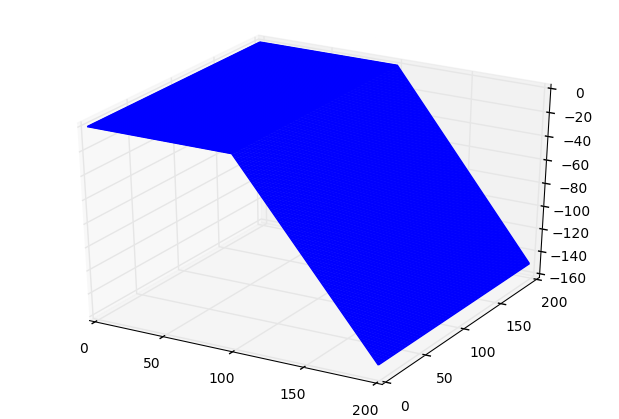

In [47]:
fig = plt.figure()
ax = Axes3D(fig)
xx,yy = np.meshgrid(x, y) # 格子点となるx,y座標を作成。  
ax.plot_wireframe(xx, yy, C)
plt.show()

In [48]:

map_xy = np.array(D, np.float32)
map_xy = np.swapaxes(map_xy, 0, 2)
map_xy

array([[[   0.,    0.],
        [   0.,    1.],
        [   0.,    2.],
        ..., 
        [   0.,  197.],
        [   0.,  198.],
        [   0.,  199.]],

       [[   1.,    0.],
        [   1.,    1.],
        [   1.,    2.],
        ..., 
        [   1.,  197.],
        [   1.,  198.],
        [   1.,  199.]],

       [[   2.,    0.],
        [   2.,    1.],
        [   2.,    2.],
        ..., 
        [   2.,  197.],
        [   2.,  198.],
        [   2.,  199.]],

       ..., 
       [[ 197.,    0.],
        [ 197.,    1.],
        [ 197.,    2.],
        ..., 
        [ 197.,  197.],
        [ 197.,  198.],
        [ 197.,  199.]],

       [[ 198.,    0.],
        [ 198.,    1.],
        [ 198.,    2.],
        ..., 
        [ 198.,  197.],
        [ 198.,  198.],
        [ 198.,  199.]],

       [[ 199.,    0.],
        [ 199.,    1.],
        [ 199.,    2.],
        ..., 
        [ 199.,  197.],
        [ 199.,  198.],
        [ 199.,  199.]]], dtype=float32)

In [49]:
map_xyz = np.zeros((200,200)+(3,), np.float32)
map_xyz[:, :, 0:2] = map_xy
map_xyz[:, :, 2] = C
map_xyz

array([[[   0.        ,    0.        ,    0.        ],
        [   0.        ,    1.        ,    0.        ],
        [   0.        ,    2.        ,    0.        ],
        ..., 
        [   0.        ,  197.        , -146.96969604],
        [   0.        ,  198.        , -148.48484802],
        [   0.        ,  199.        , -150.        ]],

       [[   1.        ,    0.        ,    0.        ],
        [   1.        ,    1.        ,    0.        ],
        [   1.        ,    2.        ,    0.        ],
        ..., 
        [   1.        ,  197.        , -146.96969604],
        [   1.        ,  198.        , -148.48484802],
        [   1.        ,  199.        , -150.        ]],

       [[   2.        ,    0.        ,    0.        ],
        [   2.        ,    1.        ,    0.        ],
        [   2.        ,    2.        ,    0.        ],
        ..., 
        [   2.        ,  197.        , -146.96969604],
        [   2.        ,  198.        , -148.48484802],
        [   2.     

NameError: name 'out' is not defined

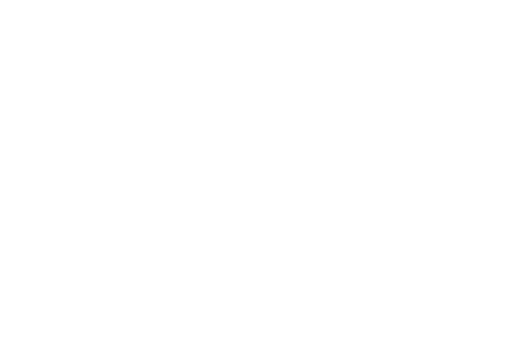

In [63]:
fig = plt.figure()
plt.axis('off')

ims = []
for img in out:
    im = plt.imshow(
        img.reshape(400,400),
        vmin = -100.0, vmax = 20.0,
        cmap=bipolar(neutral=0, lutsize=1024),
        interpolation='nearest')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims)